<a href="https://colab.research.google.com/github/letrongminh/MDL4Training/blob/main/Implement_a_Wide_and_Deep_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

# Model

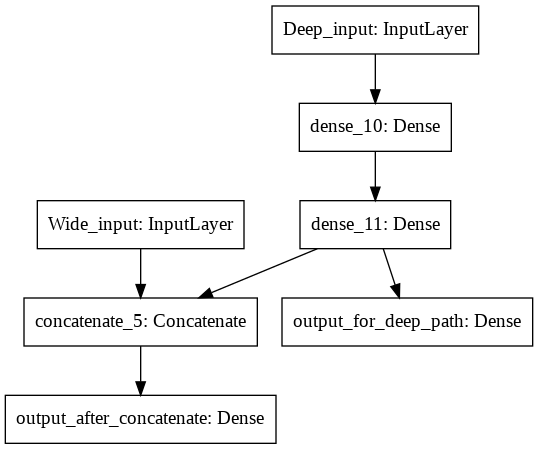

In [11]:
input_a = Input(shape=[1], name="Deep_input")
input_b = Input(shape=[1], name="Wide_input")


# deep path
hidden_1 = Dense(30, activation='relu')(input_a)
hidden_2 = Dense(30, activation='relu')(hidden_1)

# merged path
concat = concatenate([input_b, hidden_2])

# outputs
# output after concatenation
output_1 = Dense(1, name='output_after_concatenate')(concat)

# output just for deep path
output_2 = Dense(1, name='output_for_deep_path')(hidden_2)

model = Model(inputs = [input_a, input_b], outputs = [output_1, output_2])

plot_model(model)

# Implement as a Class

In [14]:
class Wide_and_Deep_model(Model):
  def __init__(self, units = 30, activation = 'relu', **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.activation = activation
    self.hidden_1 = Dense(units, activation=activation)
    self.hidden_2 = Dense(units, activation=activation)
    self.output_1 = Dense(1)
    self.output_2 = Dense(1)

  def call(self, inputs):
    input_a, input_b = inputs
    hidden_1 = self.hidden_1(input_a)
    hidden_2 = self.hidden_2(hidden_1)

    concat = concatenate([input_b, hidden_2])

    output_1 = self.output_1(concat)
    output_2 = self.putput_2(hidden_2)

    return output_1, output_2


In [15]:
model = Wide_and_Deep_model()